# kNN na dobry początek!

Na początku pobierzmy wymagane zbiory

In [17]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

Przeprowadźmy klasyfikację win metodą kNN

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 30)

In [112]:
knn = KNeighborsClassifier(n_neighbors = 50, metric = "manhattan")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=50)

In [113]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [114]:
print_results(calculate_metrics(y_test, y_pred), classifier_id="KNN Manhattan")
print_results(calculate_metrics(y_train, y_pred_train), classifier_id="KNN Manhattan")

Results for KNN Manhattan
----
  Accuracy:  0.865
  Precision: 0.8667973068033363
  Recall:    0.865
  F1 score:  0.8648344221671548
  Mislabeled 27 out of 200


Results for KNN Manhattan
----
  Accuracy:  0.86625
  Precision: 0.8665271861845519
  Recall:    0.86625
  F1 score:  0.8662247081088768
  Mislabeled 107 out of 800




Funckje do wyświetlania miar jakości modelu:

In [115]:
from sklearn.metrics.pairwise import paired_distances

In [126]:
X = [[1,1]]
y = [[0,0]]


In [129]:
paired_distances(X, y, metric="manhattan")

array([2.])

Funckja do testowania typów odległości:

In [ ]:
W pythonie, wygeneruj zbiór punktów 1,1 2,2, 3,3 4,4 5,5 i policz dla nich kolejno odległości euklidesową, chebyshewa, manhattan i minkowkisego, od punktu 0,0 Wrzuć to na wykres (scatterplot, oś x - metryka, oś y - odległość

In [134]:
points = [[[1, 1,]], [[2, 2]], [[3, 3]], [[4, 4]], [[5, 5]]]
for point in points:
    print(point)

[[1, 1]]
[[2, 2]]
[[3, 3]]
[[4, 4]]
[[5, 5]]


In [136]:
points_y = [[[1, 1,]], [[2, 2]], [[3, 3]], [[4, 4]], [[5, 5]]]
point_x = [[0, 0]]
metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']

In [158]:
pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [159]:
import scipy.spatial.distance as dist

In [218]:
from scipy.spatial.distance import cdist

euclidean_res = []
cityblock_res = []
chebyshev_res = []
minkowski_res = []

points_y = [[[1, 1]], [[2, 2]], [[3, 3]], [[4, 4]], [[5, 5]]]
point_x = [[0, 0]]
metrics = ['euclidean', 'cityblock', 'chebyshev', 'minkowski']

for point_y in points_y:
    for metric_name in metrics:
        distance = cdist(point_x, point_y, metric=metric_name)
        print(f"Distance between {point_x} and {point_y} using {metric_name} metric: {distance}")
        if metric_name == "euclidean":
            euclidean_res.append(distance)
        elif metric_name == "cityblock":
            cityblock_res.append(distance)
        elif metric_name == "chebyshev":
            chebyshev_res.append(distance)
        else:
            minkowski_res.append(distance)

Distance between [[0, 0]] and [[1, 1]] using euclidean metric: [[1.41421356]]
Distance between [[0, 0]] and [[1, 1]] using cityblock metric: [[2.]]
Distance between [[0, 0]] and [[1, 1]] using chebyshev metric: [[1.]]
Distance between [[0, 0]] and [[1, 1]] using minkowski metric: [[1.41421356]]
Distance between [[0, 0]] and [[2, 2]] using euclidean metric: [[2.82842712]]
Distance between [[0, 0]] and [[2, 2]] using cityblock metric: [[4.]]
Distance between [[0, 0]] and [[2, 2]] using chebyshev metric: [[2.]]
Distance between [[0, 0]] and [[2, 2]] using minkowski metric: [[2.82842712]]
Distance between [[0, 0]] and [[3, 3]] using euclidean metric: [[4.24264069]]
Distance between [[0, 0]] and [[3, 3]] using cityblock metric: [[6.]]
Distance between [[0, 0]] and [[3, 3]] using chebyshev metric: [[3.]]
Distance between [[0, 0]] and [[3, 3]] using minkowski metric: [[4.24264069]]
Distance between [[0, 0]] and [[4, 4]] using euclidean metric: [[5.65685425]]
Distance between [[0, 0]] and [[4,

In [219]:
chebyshev_res

[array([[1.]]), array([[2.]]), array([[3.]]), array([[4.]]), array([[5.]])]

In [220]:
minkowski_res[0][0][0]

1.4142135623730951

In [221]:
for i in range(5):
    minkowski_res[i][0][0] = (minkowski_res[i][0][0]+0.05)

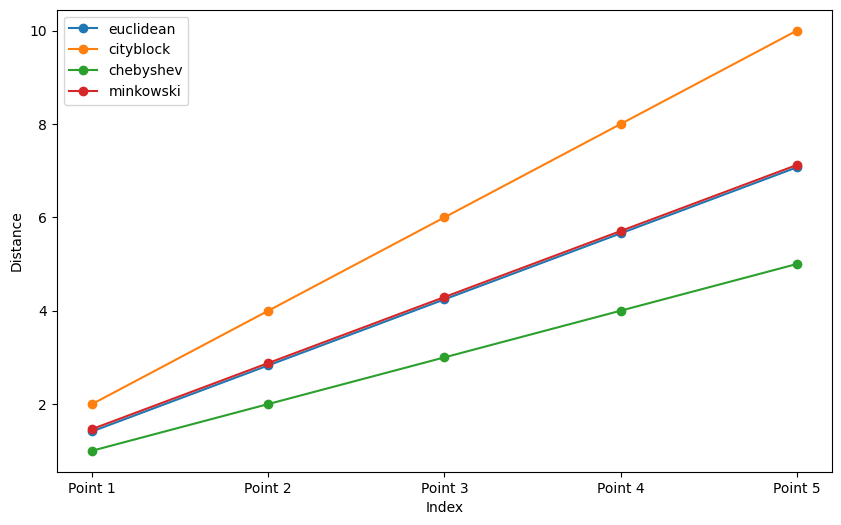

In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming euclidean_res, cityblock_res, chebyshev_res, minkowski_res contain the calculated distances

# Create a list of metric names
metric_names = ['euclidean', 'cityblock', 'chebyshev', 'minkowski']

# Create a list of distances for each metric
distances = [euclidean_res, cityblock_res, chebyshev_res, minkowski_res]

# Reshape the distances to have a compatible shape
distances = [np.squeeze(dist) for dist in distances]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each metric and its corresponding distances
for metric_name, metric_distances in zip(metric_names, distances):
    # Plot the distances on the y-axis against the index on the x-axis
    ax.plot(range(len(metric_distances)), metric_distances, marker='o', label=metric_name)

# Set the x-axis label and tick labels
ax.set_xlabel('Index')
ax.set_xticks(range(len(points_y)))
ax.set_xticklabels([f'Point {idx+1}' for idx in range(len(points_y))])

# Set the y-axis label
ax.set_ylabel('Distance')0

# Add a legend
ax.legend()

# Show the plot
plt.show()


ZADANIE DOMOWE: Przetestuj wpływ różnych rodzajów odległości i ilości sąsiadów na zbiorze glass.

# SVM

Przetestujmy SVM na zbiorze wine

In [27]:
wine, wine_classes = load_dataset("wine", "Class")
print(wine_classes)

['one' 'two' 'three']


In [33]:
wine_classes

array(['one', 'two', 'three'], dtype=object)

In [35]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

['one' 'two' 'three']


ValueError: Found input variables with inconsistent numbers of samples: [178, 3]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 30)

I dobierzmy grid searchem optymalną wartość współczynnika regularyzacji

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(C = 0.1, kernel="linear")
svm.fit(X_train,y_train)
y_pred_train = svm.predict(X_train)
y_pred = svm.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_pred_train),'\n')
print(confusion_matrix(y_test, y_pred))

[[45  0  2]
 [ 0 37  1]
 [ 0  1 56]] 

[[12  0  0]
 [ 0 10  0]
 [ 0  1 13]]


No dobrze, ale co w przypadku, gdy nasze dane nie są liniowo separowalne? Trzeba dokonać transofmracji. Do tego służy nam Kernel SVM

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#    None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [41]:
metrics = calculate_metrics(y_test, y_pred, average= "weighted")

In [42]:
print_results(calculate_metrics(y_test, y_pred), classifier_id="classifier")

Results for classifier
----
  Accuracy:  0.9722222222222222
  Precision: 0.9747474747474748
  Recall:    0.9722222222222222
  F1 score:  0.9723691945914168
  Mislabeled 1 out of 36




In [45]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 30)

['one' 'two' 'three']


In [58]:
grid = { 
    'C': np.arange(0, 1, 0.1),
    'kernel': ['linear', 'poly', 'rfb', 'sigmoid'],
    'degree' : np.arange(1, 5, 1),
    'gamma' :['scale', 'auto'],
}

In [59]:
svc_cv = GridSearchCV(estimator=SVC(), param_grid=grid, cv=3, n_jobs=1)

svc_cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
312 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'degree': array([1, 2, 3, 4]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rfb', 'sigmoid']})

In [60]:
svc_cv.best_estimator_

SVC(C=0.1, gamma='auto', kernel='poly')

In [66]:
svc_cv.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [68]:
y_pred = svc_cv.predict(X_test)
y_pred_train = svc_cv.predict(X_train)

Porównajmy sobie różne wartości regularyzacji i przekształceń gamma

In [70]:
print_results(calculate_metrics(y_test, y_pred, average="weighted"))

Results for classifier
----
  Accuracy:  0.9722222222222222
  Precision: 0.974074074074074
  Recall:    0.9722222222222222
  F1 score:  0.9719701552732407
  Mislabeled 1 out of 36




In [69]:
print_results(calculate_metrics(y_train, y_pred_train, average="weighted"))

Results for classifier
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 142




ZADANIE DOMOWE: Na zbiorze breast_cancer wytrenuj trzy wybrane modele, dobierz wartości parametrów i porównaj wyniki.

In [71]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.4, random_state=30)

/var/folders/ms/wkr5qnw531n49nj670qhvllh0000gn/T/ipykernel_29637/804144289.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X[:,0][y==0], X[:,1][y==1], "g", color = "blue")


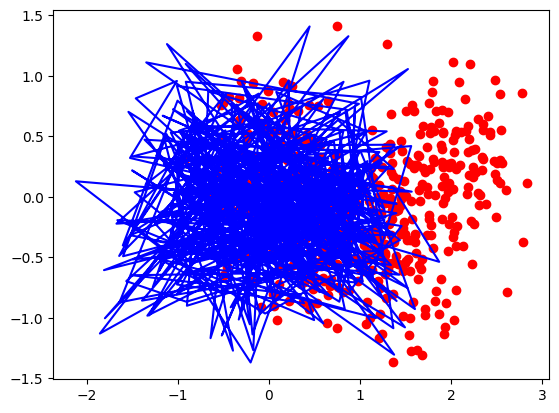

In [79]:
plt.plot(X[:,0][y==1], X[:,1][y==1], "o", color = "red")
plt.plot(X[:,0][y==0], X[:,1][y==1], "g", color = "blue")

ZADANIE DOMOWE: Przeprowadź analogiczny eksperyment używając walidacji krzyżowej.